In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
from scipy.interpolate import griddata

In [81]:
#Подгрузка вытянутых данных по льду за одни сутки
SIC = pd.read_csv('noname.csv',
           sep = ',',
           header = 0)
SIC = SIC[['lon','lat','sic']]

In [89]:
#Разделение данных по долготам и широтам
x = pd.unique(SIC['lon'])
y = pd.unique(SIC['lat'])

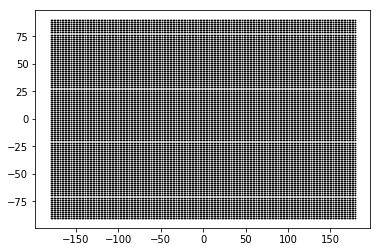

In [100]:
#Создание модельной сетки
def grid(x_min, x_max, y_min, y_max, x_step, y_step):
    xi = np.arange(x_min, x_max, x_step)
    yi = np.arange(y_min, y_max, y_step)
    xx, yy = np.meshgrid(xi, yi)
    
    return xi, yi, xx, yy

xi, yi, xx, yy = grid(-180, 180, -90, 90,1.85, 1.85)
plt.scatter(xx, yy, marker = 'o', c = 'k', s = 0.5)

In [101]:
z = pd.unique(SIC['sic'])
#lat_ =[]
#lon_=[]
#for j in range(len(lat)):
#    for k in range(len(lon)):
#        lat_.append(lat[j])
#        lon_.append(lon[k])

In [92]:
#griddata((x,y),
#        z,
#       (xx,yy))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [102]:
zi = griddata((SIC['lon'].values, SIC['lat'].values),
                  SIC['sic'].values,
                  (xx, yy),
                  method='linear')
#levels = np.arange(min(SIC['sic'].values),
#                  max(SIC['sic'].values),
#                  0.1)
#plt.contourf(xx,
#            yy,
#            zi,
#            levels,
#            cmap=plt.get_cmap('coolwarm'))

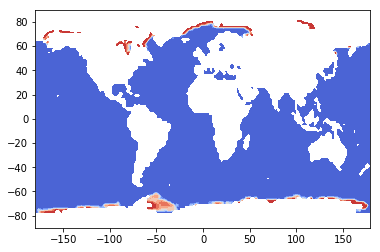

In [103]:
levels = np.arange(0,
                  100,
                  10)
plt.contourf(xx,
            yy,
            zi,
            levels,
            cmap=plt.get_cmap('coolwarm'))

In [98]:
zi
new_x = xx[0,:]
new_y = yy[:,0]
zi

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,  0.        ],
       [        nan,         nan,         nan,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan

In [99]:
lat =[]
lon=[]
for j in range(len(new_y)):
    for k in range(len(new_x)):
        lat.append(new_y[j])
        lon.append(new_x[k])
cords = np.column_stack((lat, lon))
array_out = np.column_stack((cords, zi.flatten()))
array_out

array([[ 60.        , -20.        ,   0.        ],
       [ 60.        , -18.15      ,   0.        ],
       [ 60.        , -16.3       ,   0.        ],
       [ 60.        , -14.45      ,   0.        ],
       [ 60.        , -12.6       ,   0.        ],
       [ 60.        , -10.75      ,   0.        ],
       [ 60.        ,  -8.9       ,   0.        ],
       [ 60.        ,  -7.05      ,   0.        ],
       [ 60.        ,  -5.2       ,   0.        ],
       [ 60.        ,  -3.35      ,   0.        ],
       [ 60.        ,  -1.5       ,   0.        ],
       [ 60.        ,   0.35      ,   0.        ],
       [ 60.        ,   2.2       ,   0.        ],
       [ 60.        ,   4.05      ,   0.        ],
       [ 60.        ,   5.9       ,          nan],
       [ 60.        ,   7.75      ,          nan],
       [ 60.        ,   9.6       ,          nan],
       [ 60.        ,  11.45      ,          nan],
       [ 60.        ,  13.3       ,          nan],
       [ 60.        ,  15.15   

<type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 0

In [282]:
longitude = tempgrp.createVariable('Longitude', 'f4', 'lon')
latitude = tempgrp.createVariable('Latitude', 'f4', 'lat')  
levels = tempgrp.createVariable('Levels', 'i4', 'z')
temp = tempgrp.createVariable('Temperature', 'f4', ('time','lon', 'lat', 'z'))
time = tempgrp.createVariable('Time', 'i4', 'time')

In [283]:
longitude[:] = lon #The "[:]" at the end of the variable instance is necessary
latitude[:] = lat
levels[:] = z
i = np.where(z==3000)[0][0]
temp[0,:,:,i] = temp_data

In [284]:
from datetime import datetime
today = datetime.today()
time_num = today.toordinal()
time[0] = time_num

In [285]:
#Add global attributes
f.description = "Example dataset containing one group"
f.history = "Created " + today.strftime("%d/%m/%y")

#Add local attributes to variable instances
longitude.units = 'degrees'
latitude.units = 'degrees'
time.units = 'days since Jan 01, 0001'
temp.units = 'C'
levels.units = 'meters'
temp.warning = 'This data is not real!'

In [286]:
f.close()

In [247]:
from grads.ganum import GaNum
ga = GaNum(Bin='gradsnc')
ts = ga.exp("ts")  # export variable ts from GrADS
ts = ts - 273
ga.imp("tc",ts)
ga("display tc")
# convert ts to Celsius
# send the NumPy array to GrADS
# display the just imported variable

array([-42.5  , -42.498, -42.496, ..., -39.506, -39.504, -39.502],
      dtype=float32)

In [274]:
np.shape(zi)

(750, 1500)

In [229]:
np.savetxt('yi.txt', yi)